# Task 3: Helper notebook for loading the data and saving the predictions

In [16]:
import pickle
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt

### Helper functions

In [4]:
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [5]:
def save_zipped_pickle(obj, filename):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, 2)

### Load data, make predictions and save prediction in correct format

In [6]:
# load data
train_data = load_zipped_pickle("train.pkl")
test_data = load_zipped_pickle("test.pkl")
samples = load_zipped_pickle("sample.pkl")

Examine images with labels

first frame of video without label


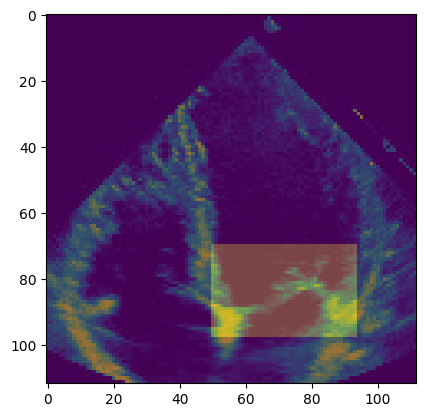

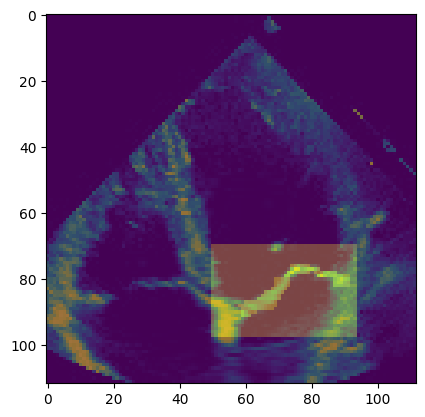

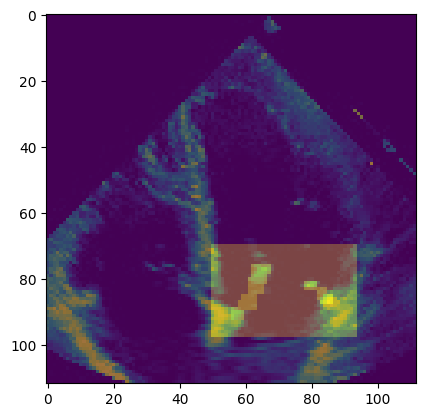

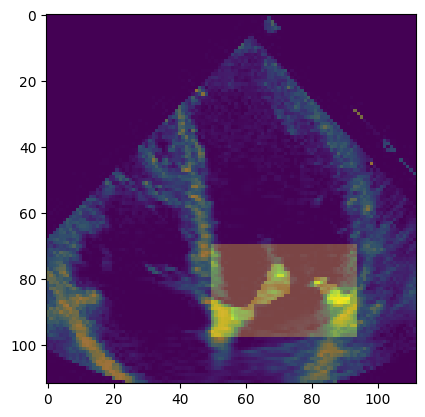

In [41]:
# plot first frame of video:
# plt.imshow(train_data[0][0])
for i in [0,15,59,143]:
    if(i==0):
        print("first frame of video without label")
    plt.imshow(train_data[0]["video"][:,:,i])
    plt.imshow(train_data[0]["label"][:,:,i], alpha=0.3)
    plt.imshow(train_data[0]["box"], alpha=0.3)
    plt.show()
# train_data[0]["box"].shape
# plt.imshow(train_data[0]["box"])

In [8]:
# make prediction for test
predictions = []
for d in test_data:
    prediction = np.array(np.zeros_like(d['video']), dtype=bool)
    height = prediction.shape[0]
    width = prediction.shape[1]
    prediction[int(height/2)-50:int(height/2+50), int(width/2)-50:int(width/2+50)] = True
    
    # DATA Strucure
    predictions.append({
        'name': d['name'],
        'prediction': prediction
        }
    )

In [7]:
# save in correct format
save_zipped_pickle(predictions, 'my_predictions.pkl')

## To DO
### Preprocessing – Data Augmentation for increase of dataset
### Model for Finding Box from Image (U-NET)
### Model for finding Mitral Valve in Box cut out (U-NET)
### Postprocessing